#🤿 **IMERSÃO DE DADOS - ALURA**

## AULA 1 | Python e Pandas e o problema fármaco
---
**Atividades**: 

Nesta aula teremos nosso primeiro contato com Python e a famosa biblioteca Pandas, utilizando diversas funcionalidades da mesma para explorar dados do ramo de Drug Discovery. 

**Objetivo**
Durante nossa análise de dados, vamos descobrir fatores importantes para a obtenção de insights e também aprenderemos como plotar os gráficos de pizza e de colunas discutindo pontos positivos e negativos.

<br>

🎞️ [YOUTUBE](https://www.youtube.com/watch?v=xGT2cuu5RPg&list=WL&index=4&t=1396s)
com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 


## 💉 **DADOS**

[Desafio original no Kaggle](https://www.kaggle.com/c/lish-moa)

<br>

Coluna| Tipo de Dado | Descrição
------|--------------|----------
*tratamento*| categórico | indica se houve o uso de droga (`com_droga`) ou não (`com_controle`)
*tempo* | numérico | intervalo entre o momento de aplicação de uma droga até o momento de avaliação de seu efeito, comumento chamado de **tempo de exposição**
*dose* | categórico | considerado que **D1** refere-se a uma dose menor e que **D2** refere-se a uma dose maior
*droga* | categórico | os dados foram anonimizados para remover o viés da análise e possíveis questões éticas
*g0-n* | numérico | expressão de cada um dos genes em relação a droga e/ou dose.(Dados provavelmente normalizados)
*c0-n* | numérico | tipo celular(linhagem celular), indica quantas células sobreviveram ou não a exposição de um composto.


#### 📒 Vocabulário
 

*   **Genes**: são trechos do DNA com a capacidade de sintetizar uma proteína.
*   **RNA mensageiro (mRNA)**: carrega a informação de síntese da proteína do núcleo ao citoplasma celular.


 <hr>

Em uma **expressão gênica** normal, uma célula irá produzir 4 RNAs para produzir uma proteína. Essa célula poderá ser submetida a estímulos (internos ou externos), responsáveis por aumentar ou diminuir sua expressão gênica. 

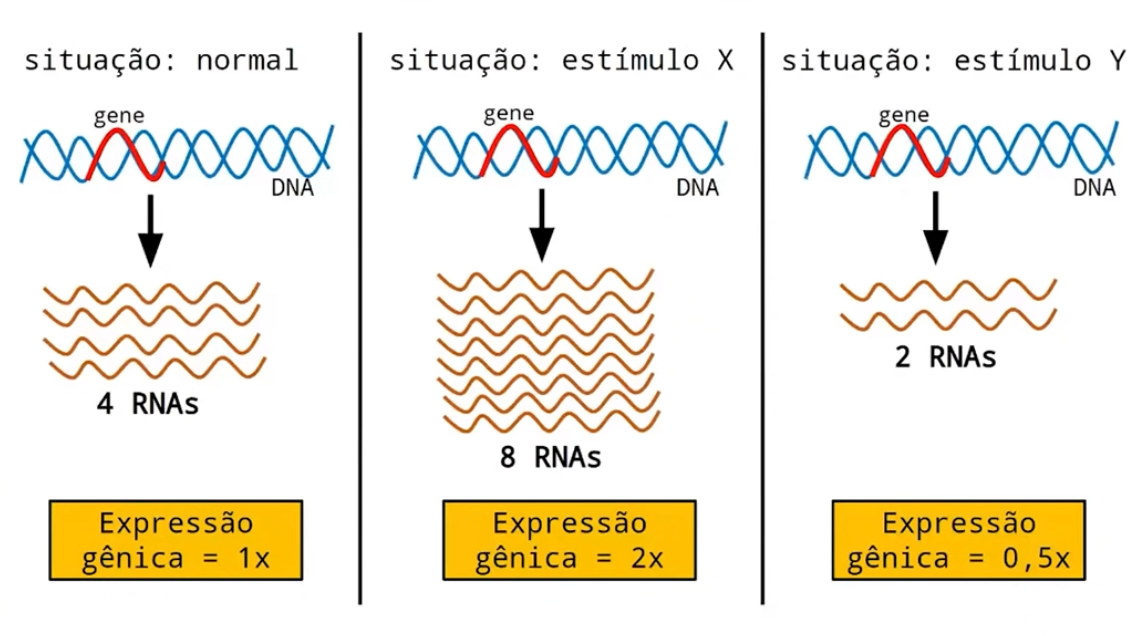

In [1]:
import pandas as pd

url = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
data = pd.read_csv(url, compression = 'zip')

In [2]:
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [4]:
data.dtypes

id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

Identificando as categorias dos atributos categóricos

In [5]:
for col in data.select_dtypes(include='object'):
  print(f'{col} : {data[col].unique()}\n')

id : ['id_000644bb2' 'id_000779bfc' 'id_000a6266a' ... 'id_fffc1c3f4'
 'id_fffcb9e7c' 'id_ffffdd77b']

tratamento : ['com_droga' 'com_controle']

dose : ['D1' 'D2']

droga : ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']



Analisando os dados de tratamento

In [6]:
data['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

#### **Desafio 01** | Investigar por que a classe tratamento é tão desbalanceada? 

In [7]:
data_treatment = data.loc[:,'tratamento':'droga']

**Avaliando tratamentos `com controle`** 

Todos os tratamentos avaliados **com_controle** utilizaram a mesma droga, identificada como `cacb2b860`. É possível observar que houve uma distribuição homogênea entre os grupos de tempo e dose, com um pequeno aumento na aplicação da dose D1 com taxa de exposição de 48 horas. 

In [8]:
data_treatment[data.tratamento == 'com_controle'].value_counts().sort_index()

tratamento    tempo  dose  droga    
com_controle  24     D1    cacb2b860    301
                     D2    cacb2b860    305
              48     D1    cacb2b860    343
                     D2    cacb2b860    305
              72     D1    cacb2b860    307
                     D2    cacb2b860    305
dtype: int64

**Analisando tratamentos `com_drogas`**

É possível observar que assim como os tratamentos `com_controle`, existe uma distribuição praticamente homogênea entre os grupos. 

Contamos com o teste de **3289 drogas** que, se fosem combinadas considerando a variação de tempo e dosagem proposta, seriam necessários **19.734 amostras**. A amostragem obtida no experimento é **2.214 amostras maior**, o que equivale a um acréscimo de 10,09%. 

No caso, vemos um **número maior de testes para dose D1 e o tempo de exposição de 48h**, assim como ocorreu nos tratamentos com_controle. Isso pode indicar uma maior variedade do atributo de estudo que esteja relacionado a condição. 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
with_drugs = data_treatment[data.tratamento == 'com_droga'].loc[:,'tempo':'droga']

In [11]:
drugs_time_eval = with_drugs.set_index('droga').groupby('tempo').count().reset_index()
drugs_time_eval = drugs_time_eval.sort_values(by = 'dose', ascending = False)
drugs_time_eval.reset_index(inplace=True, drop=True)
drugs_time_eval

,tempo,dose
0,48,7602
1,72,7180
2,24,7166


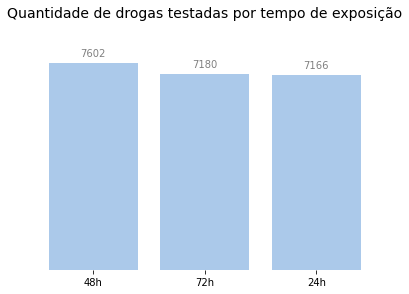

In [12]:
sns.set_color_codes('pastel')
sns.barplot(x = drugs_time_eval['dose'].index, y = drugs_time_eval['dose'].values, color='b')
plt.title('Quantidade de drogas testadas por tempo de exposição', pad = 35, fontsize = 14)
plt.xticks(ticks = drugs_time_eval.index, labels = ['48h', '72h', '24h'] )
plt.yticks(ticks = [])
plt.xlabel(xlabel ='')

for i in range(3):
  space = 250
  s = drugs_time_eval['dose'].values[i]
  xy = (i, drugs_time_eval['dose'].values[i] + space )
  plt.annotate(s, xy, ha='center', color = 'gray')

sns.despine(left = True, bottom = True)

In [13]:
with_drugs.set_index('droga').groupby('dose').count()

drugs_dose_eval = with_drugs.set_index('droga').groupby('dose').count().reset_index()
drugs_dose_eval = drugs_dose_eval.sort_values(by = 'tempo', ascending = False)
drugs_dose_eval.reset_index(inplace=True, drop=True)
drugs_dose_eval

,dose,tempo
0,D1,11196
1,D2,10752


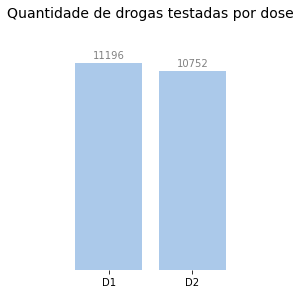

In [14]:
f,ax = plt.subplots(figsize = (3,4))
sns.set_color_codes('pastel')
sns.barplot(x = drugs_dose_eval['tempo'].index, y = drugs_dose_eval['tempo'].values, color='b')
plt.title('Quantidade de drogas testadas por dose', pad = 35, fontsize = 14)
plt.xticks(ticks = drugs_dose_eval.index, labels = ['D1', 'D2'] )
plt.yticks(ticks = [])
plt.xlabel(xlabel ='')

for i in range(2):
  space = 250
  s = drugs_dose_eval['tempo'].values[i]
  xy = (i, drugs_dose_eval['tempo'].values[i] + space )
  plt.annotate(s, xy, ha='center', color = 'gray')

sns.despine(left = True, bottom = True)

In [15]:
drugs_count = data['droga'].unique().size
print(f'Quantidade de drogas: {drugs_count}')

Quantidade de drogas: 3289


In [16]:
min_drug_sample = drugs_count * 2 * 3
print(f'Quantidade mínima de amostras para cada droga: {min_drug_sample}')

Quantidade mínima de amostras para cada droga: 19734


In [17]:
print(f'Relação com a amostragem real: {with_drugs.shape[0] - min_drug_sample} | {round((1- min_drug_sample/ with_drugs.shape[0]) * 100,2)}%')

Relação com a amostragem real: 2214 | 10.09%


#### **Desafio 02** | Deixar os gráficos bonitos

Embora a prosposta dos educadores tenha sido utilizar a biblioteca matplotlib, preferi utilizar o seaborn apenas por considerar que a estética é melhor. 

Ainda, optei por utilizar barras horizontais em relação as barras verticais. Isso porque os títulos utilizados eram longos para o espaço destinado. Na configuração padrão, seriam mostrados com uma inclinação de 90°, o que dificultaria a leitura do gráfico. Se alterados para a posição horizontam precisariam ser abreviados,podendo comprometer o entendimento da categoria. 

#### **Desafio 03** | Calcular a proporção das classes tratamento 

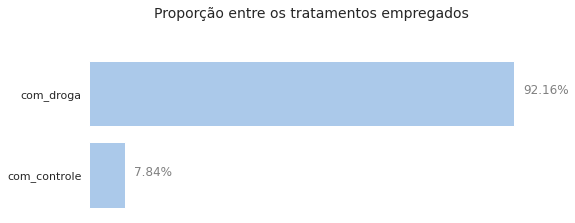

In [18]:
treatment = data['tratamento'].value_counts(normalize = True)

#define a cor do fundo do gráfico
sns.set_style("white")

#configurações do gráfico
f,ax = plt.subplots(figsize = (8,3))
sns.set_color_codes('pastel')
sns.barplot(y = treatment.index, x = treatment.values, color='b', orient ='h')
plt.title('Proporção entre os tratamentos empregados', pad = 35, fontsize = 14)
plt.xticks(ticks=[])
plt.yticks(fontsize=11)

#adicionar valores nas barras horizontais
for p in ax.patches:
  space = 0.02
  _x = p.get_x() + p.get_width() + float(space)
  _y = p.get_y() + p.get_height()/2
  value = f'{round(float(p.get_width()) * 100, 2)}%'
  ax.text(_x, _y, value, ha='left', color = 'gray', fontsize=12)

#remover o eixo vertical
sns.despine(left = True, bottom = True)

#### **Desafio 04** | Quantas tipos de drogas foram investigadas?

In [19]:
data['droga'].unique().size

3289

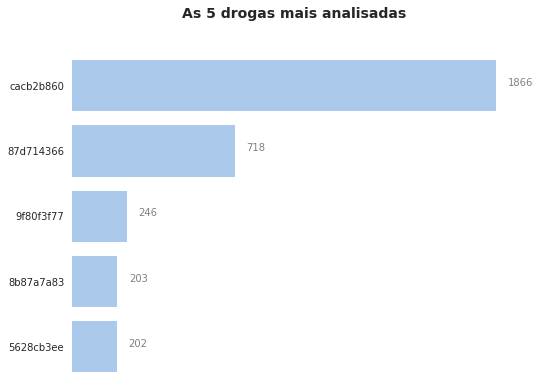

In [20]:
top_drugs = data['droga'].value_counts().nlargest(5)

sns.set_style("white")

#configurações do gráfico
f,ax = plt.subplots(figsize = (8,6))
sns.set_color_codes('pastel')
sns.barplot(y= top_drugs.index, x=top_drugs.values, color='b', orient ='h')
plt.title('As 5 drogas mais analisadas', pad=35, fontsize=14,  fontweight ='bold')
plt.xticks(ticks=[])

#adicionar valores nas barras horizontais
for p in ax.patches:
  space = 50
  _x = p.get_x() + p.get_width() + float(space)
  _y = p.get_y() + p.get_height()/2
  value = int(p.get_width())
  ax.text(_x, _y, value, ha='left', color = 'gray')

#remover o eixo vertical
sns.despine(left = True, bottom = True)


#### **Desafio 05** | Quais são os dados que possuem o atributo g-0 maiores que zero?

Nesse desafio, estava-se considerando que os números acima de zero poderiam representar um aumento da expressão gênica. Seria necessário mais informações para confirmar essa suposição.

In [21]:
data[data['g-0'] > 0]

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.55

Pode-se observar que existem **11.769 amostras** com valores g-0 maiores que zero.

Esse mesmo resultado poderia ser obtido utilizando o método `query` . Mas para isso, será preciso renomear a coluna devido a um problema de interpretação da biblioteca de nomes com caracter `-`

#### **Desafio 06** | Renomear as colunas tirando o hífen

In [22]:
data.columns = data.columns.map(lambda col: col.replace('-', ''))

In [23]:
data.query('g0 > 0')

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,0.0959,-0.2201,0.2443,0.4879,0.3432,0.4151,0.9056,0.3538,0.5246,-0.4441,-0.1605,-0.3720,-0.5619,-0.1409,0.1255,0.1214,-0.1975,-0.4367,0.0000,0.4301,-0.7606,-0.0248,0.0270,-0.0367,-1.2480,0.0559,-0.0984,0.5537,0.1063,0.3893,...,0.5554,0.2225,-0.0903,0.9227,-0.0460,0.3756,1.0730,-0.

#### **Desafio 07** | Resumo do aprendizado

Os dados referem-se a um estudo comparativo do estimúlos de 3.289 drogas em relação a droga cacb2b860 quanto a síntese de proteínas celular em 100 genes diferentes. 

Como não se tem certeza do significado dos dados apresentados em relação aos genes, sua análise seria um equivocada.

Existe indícios que apontam um maior interesse e/ou esforço em relação as amostras com tempo de exposição de 48h relacionadas a dose D1.

#🤿 **IMERSÃO DE DADOS - ALURA**

## AULA 2 | Estatística, visualização de dados e distribuições

---

**Objetivo:** Nesta aula aprenderemos a plotar e estilizar gráficos com as bibliotecas `seaborn` e `matplotlib`, utilizando recursos de seleção e tratamentos nos dados. Conheceremos o histograma para visualizar a média dos genes. Utilizaremos a função `describe` para descrever estatisticamente os dados. Por fim, entendemos o `boxplot` e como tratar os outliers.

<br>

🎞️ [YOUTUBE](https://www.youtube.com/watch?v=lMzhxPrIxHU&list=WL&index=1&t=199s)
com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 


A **Vanessa Leiko**, especialista em genética, informou no início da segunda aula que não existem 3.289 drogas. Com isso, sugeriu que o nome fosse alterado de `drogas` para `compostos`. 

<br>

#### 📒 Vocabulário
- **Compostos**: são pequenas moléculas sob estudo que podem vir a se tornar drogas. 


In [24]:
data.rename(columns={'droga': 'composto'}, inplace=True)
data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Como são muitos compostos sendo avaliados, assim como havia feito na aula passada, o instrutor **Thiago** buscou apresentar graficamente apenas os 5 compostos mais frequentes no estudo. Contudo ele utilizou uma lógica diferente da que havia utilizado, criando um conjunto com os nomes das drogas e posteriormente, aplicando uma query.

In [25]:
little_cels_code = data['composto'].value_counts().index[0:5]
query_top_5 = data.query('composto in @little_cels_code')

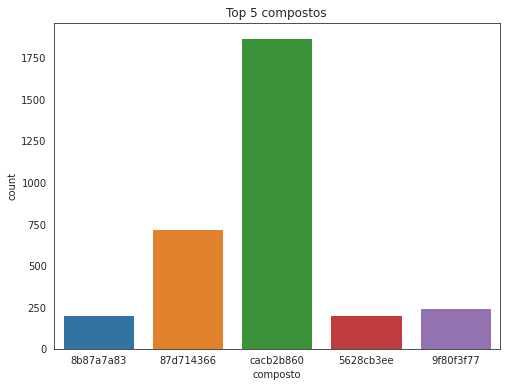

In [26]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data = query_top_5)
ax.set_title('Top 5 compostos')
plt.show()

#### **Desafio 01** | Ordernar o gráfico construído pelo countplot e melhorar sua visualização

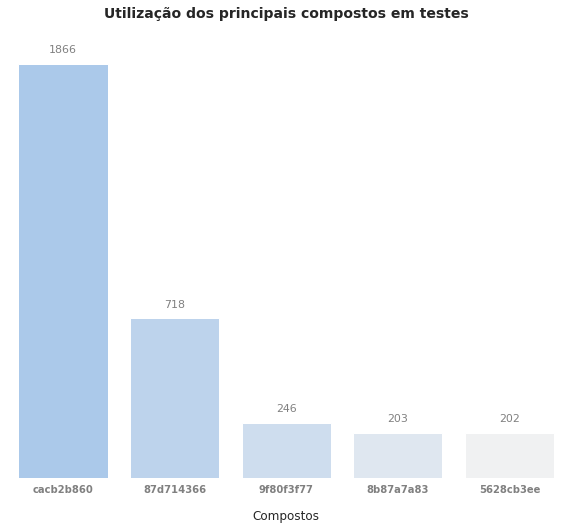

In [27]:
plt.figure(figsize=(10, 8))
sns.set_color_codes('pastel')
ax = sns.countplot(x = 'composto', data = query_top_5, order= little_cels_code, palette="light:b_r")
plt.title('Utilização dos principais compostos em testes', pad = 25, fontsize = 14, fontweight ='bold')
plt.xlabel('Compostos', fontsize = 12, labelpad=15 )
plt.ylabel('')
plt.xticks(fontweight='bold', color='gray')
plt.yticks(ticks=[])

for p in ax.patches:
  space = 50
  s = str(p.get_height())
  xy = (p.get_x() + p.get_width()/2, p.get_height() + space )
  plt.annotate(s, xy, ha='center', color = 'gray', fontsize=11)

sns.despine(left = True, bottom = True)

### 🧬 Analisandos os dados de expressão genética

Como as expressões genéticas estudadas são muitas(14.367 variações) e representam valores numéricos contínuos, será utilizado [histogramas](https://www.alura.com.br/artigos/o-que-e-um-histograma?utm_source=gnarus&utm_medium=timeline) como representação gráfica. 


In [28]:
len(data['g0'].unique())

14367

**HISTOGRAMAS**

🐾 *Passos para a construção de um histograma:*

1. Identificar qual o **valor mínimo** (min()) e o **valor máximo** (max()) para entender qual o intervalo númerico com o qual estamos trabalhando.

2. Determinar a **quantidade de intervalos de classe(bins)** que serão apresentados no histograma.

*Nota: Não foi possível inserir diretamente na função print o cálculo do mínimo e máximo, provavelmente devido ao nome da coluna incluir um caracter numérico.*

In [29]:
min = data['g0'].min()
max = data['g0'].max()
print(f'Mínimo: {min} | Máximo: {max}')

Mínimo: -5.513 | Máximo: 10.0


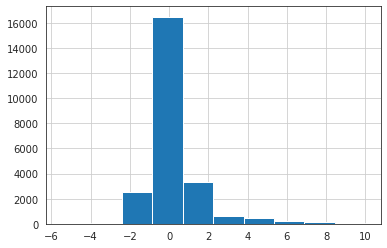

In [30]:
data['g0'].hist()

Os dados estão muito agrupados utilizando a função de histograma sem determinar o intervalo de classe. Foi então sugerido adotar o valor 100.

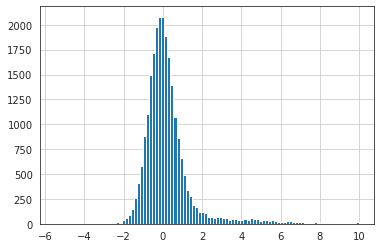

In [31]:
data['g0'].hist(bins = 100)

Embora essa alteração permita visualizar o comportamento normal da curva, esse palpite poderia requere muito tempo e/ou experiência do analista. Deve haver outras formas de ser mais acertivo...

#### **Como determinar a quantidade de bins ❓**
Embora não tenha sido mencionado em aula e apenas surgiu o número mágico 100 como um bom valor, é possível realizar uma estimativa de qual valor poderia ser o mais indicado. Para isso, será utilizado um método que pode ser encontrado na íntegra nesse [site](https://www.statisticshowto.com/choose-bin-sizes-statistics/)

**Regra de Sturge** | 
utilizada quando os dados são contínuos, normalmente distribuídos e simétricos.

```
        K = 1 + 3.322 logN
```

onde:
- K = Número de intervalos de classe(bins)
- N = Número de observações

In [32]:
import math

K = 1 + 3.322 * math.log(data['g0'].unique().size)
int(round(K,0))

33

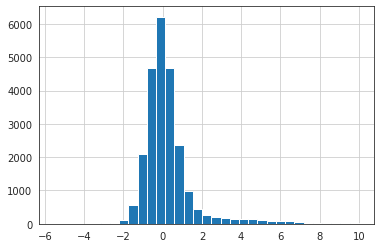

In [33]:
data['g0'].hist(bins = 33)

Temos **772 variações de experessões genéticas** nos dados (g0 a g771). Por isso, construir um histograma para cada uma delas seria inviável. Contudo, ainda é possível avaliarmos em conjunto.


In [34]:
sum([True for col in data.columns.values if col.startswith('g')])

772

In [35]:
data.loc[:, 'g0': 'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.508900,-0.533900

#### **Desafio 03** | Estudar sobre as estatísticas retornadas no describe


[Artigo](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe)



Apesar do describe reunir as nossas estatísticas de interesse, é bastante complexo analisar o dataframe resposta. Para facilitar o nosso entendimento, vamos plotar histogramas que nos ajudaram na visualização das estatísticas de todas as colunas selecionadas.

Olhando o dataframe original, anteriormente, fizemos o histograma de apenas uma coluna. Mas agora, nosso conjunto de dados de interesse é o ```describe()``` que fizemos a partir do ```loc[]``` e, deste ponto de vista, não queremos mais fazer o histograma coluna a coluna (genes), queremos que ele seja a partir das linhas (estatísticas). Por isso, vamos transpor as linhas e colunas (transformar as linhas em colunas e vice-versa).
Para isso, vamos usar o ```.T[]``` no código anterior que produzimos para organizar o ```describe()```.

Ou seja, vamos manter todo o código até o ```describe()``` e, ao final, acrescentaremos o ```.T[]```. Mas, ao rodarmos essa linha, percebemos que temos como devolutiva o mesmo dataframe mas transposto. E, como aqui, nosso interesse é produzir histogramas, acrescentamos como argumento do ```.T[]``` a estatística alvo (```.T['estatística']```) e, por último, acrescentamos o ```.hist(bins = número de quebras)``` para que o histograma seja observado.

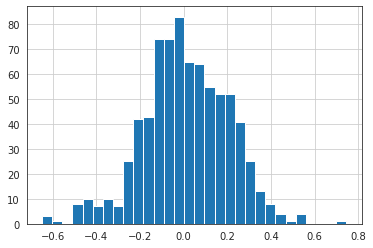

In [36]:
data.loc[:, 'g0': 'g771'].describe().T['mean'].hist(bins = 30)

A seguir, reproduzimos o código acima apenas alterando o parâmetro estatístico a ser analisado (mínimo e máximo, por exemplo). 
E assim, podemos perceber as nuances de cada métrica.

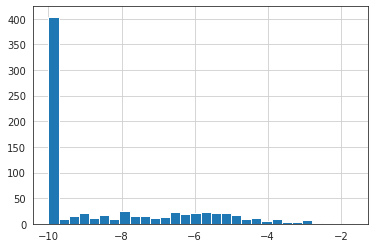

In [37]:
data.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30)

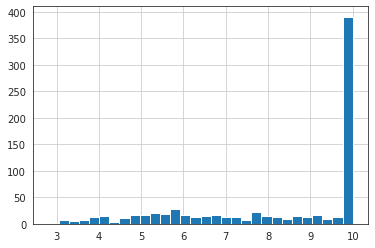

In [38]:
data.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30)

#### **Desafio 02** | Plotar os histogramas com seaborn

Pode-se observar pelo gráfico acima a variação das distrubições para cada expressão genética. Por serem, muitas a análisa conjunta como média apresenta uma boa aproximação do comportamento. No entanto, não é possível avaliar a dispersão dos dados apenas com essa medida.

Text(0.5, 1.0, 'Expressão genética média dos genes')

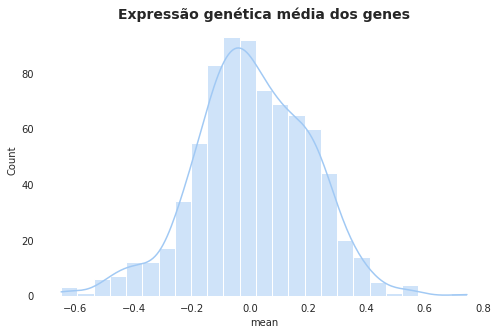

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data.loc[:, 'g0': 'g771'].describe().T['mean'], color='b', kde= True)
sns.despine(left = True, bottom = True)
plt.title('Expressão genética média dos genes', fontsize=14, fontweight='bold')

**BOXPLOT**

O **boxplot** apresenta uma caixa no meio onde podemos identificar a **mediana** (linha no meio da caixa que é o ponto onde metade dos dados estão na direita e a outra metade para a esquerda), os **outliers** (pontos acima ou abaixo do eixo principal do gráfico que representam valores discrepantes para mais ou para menos), a maior concentração dos dados (caixa principal que representa onde está a mior parte dos dados - **primeiro quartil (25%)** e **terceiro quartil (75%)**) e os máximos e mínimos desconsiderando os outliers (linhas laterais à caixa principal). O boxplot é uma importante ferramenta na visualização de dados porque em apenas um gráfico, podemos identificar várias métricas estatísticas.
[Artigo](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot)


> 💡 **Dica do instrutor Thiago**

```
BOXPLOT VERTICAIS são úteis para fazer comparações com os histogramas. 
Enquanto BOXPLOT HORIZONTAIS são úteis para comparar atributos entre si.
```



(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 11 Text major ticklabel objects>)

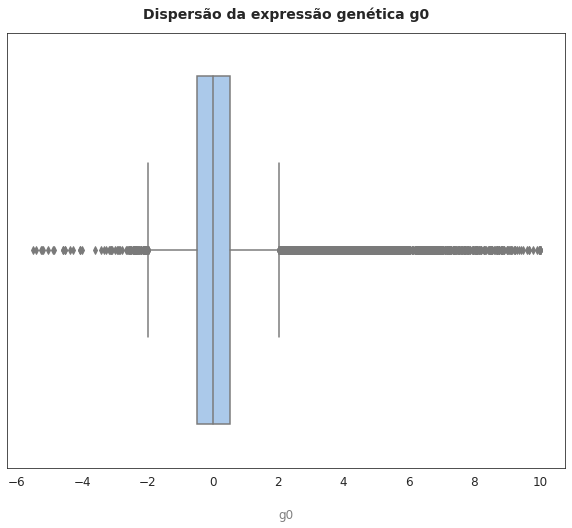

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(x='g0', data=data, color='b')
plt.title(label='Dispersão da expressão genética g0',fontweight='bold', fontsize=14, pad=15)
plt.xlabel(xlabel='g0', fontsize=12, color='gray', labelpad=20)
plt.xticks(fontsize=12)

É possível perceber que existem muitos outliers nos dados de tratamentos `com_drogas`. Do ponto de vista biológico, a investigação desses pontos podem representar uma possível solução. Dito isso, é importante para um cientista de dados não só entender e manipular a base de dados, mas também saber acerca do negócio que estamos tratando.

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 11 Text major ticklabel objects>)

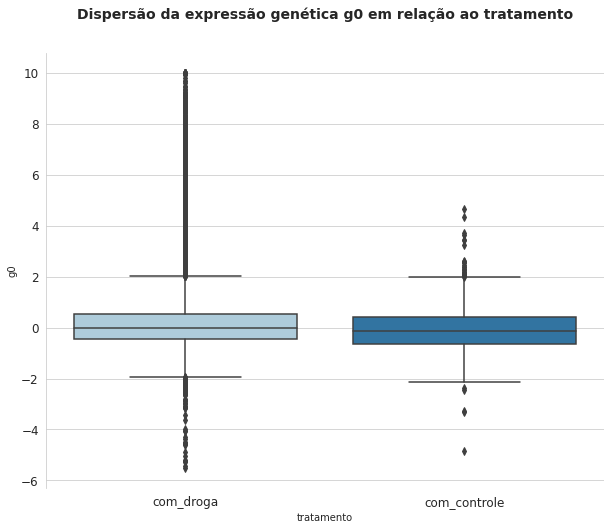

In [41]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette('Paired')
sns.boxplot(y='g0', x='tratamento' , data = data)
plt.title(label='Dispersão da expressão genética g0 em relação ao tratamento', fontweight='bold', fontsize=14, pad=35)
sns.despine(bottom = True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#### **Desafio 04** | Refletir sobre a manipulação do tamanho das visualizações

O **tamanho padrão** de uma figura no matplotlib é de:
- Polegadas = 6.4 x 4.8 in
- Pixels = 640 x 480 pixels
- DPI = 100

A maioria das telas que usamos hoje em dia possui resolução muito maior do que essa. Sendo assim, colocar uma imagem de 640 x 480 pixels em uma apresentação ou até mesmo em um texto nos mostra dois resultados diferentes: ou a imagem fica minúscula ou precisamos dar um zoom e ela fica borrada.

Uma opção é aumentar o tamanho da figura em polegadas utilizando o parâmetro `figsize`, mas ao mudar apenas esse argumento podemos ter outro problema: **o tamanho das fontes pode ficar minúsculo**

Uma boa e rápida solução para esse problema seria aumentar o DPI, o que automaticamente aumenta o tamanho das fontes.

A melhor dica que posso dar é você conhecer exatamente o tipo de mídia que serão mostrados seus gráficos e assim saber calcular o tamanho final desejado. Por exemplo, um texto acadêmico, seja TCC, dissertação de mestrado ou tese de doutorado, em geral é escrito em página A4, que possui 8,3 x 11,7 polegadas.


[Artigo](https://dev.to/betaschmitz/acertando-o-tamanho-de-seus-graficos-4ae0)

#### **Desafio 05** | Fazer outras análises com o boxplot e com o histograma

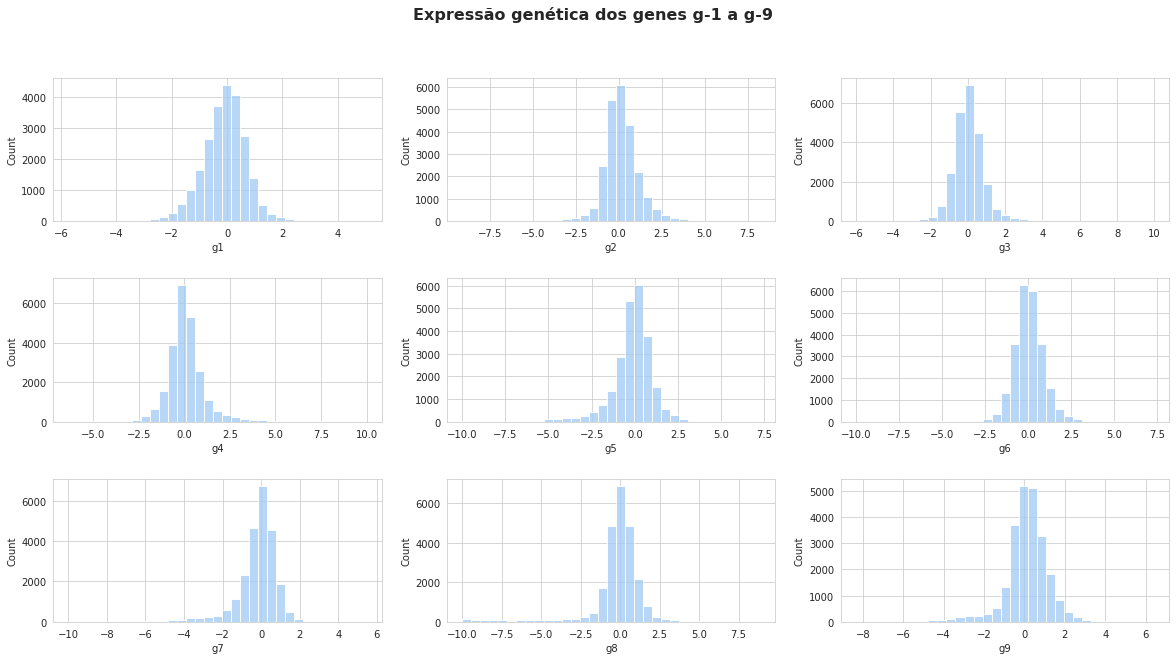

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
plt.subplots_adjust(hspace=0.4)
plt.suptitle("Expressão genética dos genes g-1 a g-9", 
             fontsize=16, 
             fontweight="bold")


count=0
mask = list(data.loc[:, 'g0': 'g9'].columns)
for row in axes:
  for col in row:
    count+=1
    sns.histplot(ax=col, data=data[mask[count]], bins=33, color='b')

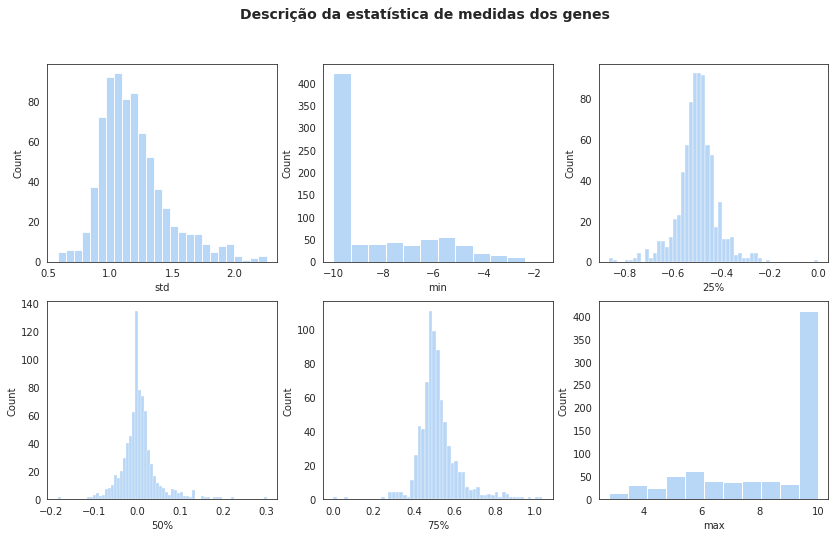

In [43]:
dataGenes = data.loc[:, 'g0':'g771'].describe().T.iloc[:, 2:8]

sns.set_color_codes('pastel')
sns.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(14,8))
plt.suptitle("Descrição da estatística de medidas dos genes",
             fontsize=14, fontweight='bold')

count=0
mask = dataGenes.columns
for row in axes:
  for col in row:
    sns.histplot(ax=col, data=dataGenes[mask[count]], color='b')
    count+=1

#### **Desafio 06** | Resumo do que você aprendeu com os dados

#🤿 **IMERSÃO DE DADOS - ALURA**

## AULA 3 | Correlações, causalidade e relações entre genes

---
**Atividade** 

Nesta aula aprenderemos como cruzar informações dos dados, analisando as relações de diversas colunas entre si. Iniciaremos relacionando os dados de experimentos e posteriormente os tipos genéticos. 

Em seguida, utilizaremos o gráfico de dispersão para investigar a relação entre os genes e discutiremos sobre o que é correlação e causalidade.

Por fim, aprenderemos como visualizar a correlação em um mapa de calor. 

<br>

**Objetivo**

Nosso objetivo é através da correlação levantar possíveis hipóteses relacionadas aos estímulos biológicos provocados pelos experimentos nas amostras celulares, por fim aprendemos como visualizar a correlação em um mapa de calor.

<br>

🎞️ [YOUTUBE](https://www.youtube.com/watch?v=5pabJ4ztS88&t=561s)
com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 


Conforme nossa busca na documentação do Pandas, encontramos uma maneira para construir uma tabela de frequências, a função `crosstab`. Esta função recebe como argumentos os dados que gostaríamos de correlacionar de uma maneira bem simples: 

```
crosstab(dataframe['coluna1'], dataframe['coluna2'])
```

e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.

Podemos ver que as categorias da variável dose transformaram-se em linhas e as categorias da variável tempo são colunas.

In [44]:
dataByDose = pd.crosstab([data['dose'], data['tempo']], data['tratamento'])
dataByDose

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [45]:
dataByDose.style.highlight_max(color='#add8e6')

É possível explorar também a proporção dos dados entre si adicionando na função anterior o `normalize`. Esse parâmetro normaliza a nossa tabela, no caso, em relação ao índice. Ou seja, ele fará a comparação entre as categorias de modo que a soma de cada linha seja igual a 1. Fazer esse tipo de análise possibilita afirmar que existe uma proporcionalidade entre as categorias.

In [46]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

#### **Desafio 01** | Criar tabelas de frequencia com pandas.groupby()

In [47]:
round(data.groupby(by=['dose', 'tempo', 'tratamento']).count()[['composto']] / data.shape[0] * 100, 2)

composto
dose tempo tratamento            
D1   24    com_controle      1.26
           com_droga        15.05
     48    com_controle      1.44
           com_droga        16.84
     72    com_controle      1.29
           com_droga        15.12
D2   24    com_controle      1.28
           com_droga        15.04
     48    com_controle      1.28
           com_droga        15.08
     72    com_controle      1.28
           com_droga        15.03

In [48]:
data.groupby(by=['dose', 'tempo', 'tratamento']).count()[['composto']].unstack()

composto          
tratamento com_controle com_droga
dose tempo                       
D1   24             301      3585
     48             343      4011
     72             307      3600
D2   24             305      3581
     48             305      3591
     72             305      3580

#### **Desafio 02** | Normalizar o crosstab pela coluna

Essa normalização permite chegar na mesma observação discutida no Desafio 1 da Aula 1 desse notebook que é um número maior de testes realizados com tempo de exposição de 48h para a dose D1.

In [49]:
dataNormalized = pd.crosstab([data['dose'], data['tempo']], data['tratamento'], normalize='columns')
dataNormalized.style.highlight_max(color='#add8e6')

Podemos também agregar à nossa matriz uma métrica estatística associada a uma coluna. Para que isso seja cumprido, adicionamos mais dois parâmetros à nossa função crosstab: o primeiro é o values = dataframe['variavel'] e o segundo é o aggfunc que recebe como parâmetro alguma métrica estatística, como a média. Logo, aggfunc = 'mean'. Isso quer dizer que queremos comparar entre as diferentes categorias (com_controle e com_droga) a média de valores associados a variável g-0.

Aqui, podemos perceber algumas diferenças entre essas médias e podemos traçar algumas hipóteses a serem verificadas. Lembrando que a média de uma variável, é uma conta feita a partir dos valores que aquela amostra apresenta e não é o valor que ela assume, de fato. Por isso, não podemos concluir nada somente olhando a média, mas entender seu comportamento nos dá indícios por quais caminhos podemos seguir.

In [50]:
pd.crosstab([data['dose'], data['tempo']], data['tratamento'], values =data['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

#### **Desafio 03** | Explorar outros aggregadores

Um **desvio padrão** grande significa que os valores amostrais estão bem distribuídos em torno da média, enquanto que um desvio padrão pequeno indica que eles estão condensados próximos da média. Em poucas palavras, **quanto menor o desvio padrão, mais homogênea é a amostra**.

In [51]:
dataStandard = pd.crosstab(index  = [data.dose, data.tempo], 
                    columns= data.tratamento, 
                    values = data['g0'], 
                    aggfunc='std')
cm = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
dataStandard.style.background_gradient(cmap=cm).format("{:.3}")

Como esperado o desvio padrão do tratamento `com droga` é pior que o desvio padrão `com_controle`. 

In [52]:
dataMin = pd.crosstab(index  = [data.dose, data.tempo], 
                    columns= data.tratamento, 
                    values = data['g0'], 
                    aggfunc='min')
dataMin.style.highlight_min(color='#add8e6').highlight_max(color='#779ecb').format("{:.3}")

In [53]:
dataMax = pd.crosstab(index  = [data.dose, data.tempo], 
                    columns= data.tratamento, 
                    values = data['g0'], 
                    aggfunc='max')
dataMax.style.highlight_min(color='#add8e6').highlight_max(color='#779ecb').format("{:.3}")

#### **Desafio 04** | Explorar o melt

Essa função é util para alterar o formato do DataFrame para um em que uma ou mais colunas são variáveis identificadoras (variáveis) enquanto as demais são consideradas variáveis mensuráveis (values).

[Exemplo](https://living-sun.com/pt/python/718169-using-pandas-melt-to-pivot-on-two-sets-of-data-python-python-27-pandas.html)

-----
This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [54]:
columns = data.loc[:, 'g0': 'g9'].columns
pd.melt(data, id_vars=['dose', 'tempo', 'tratamento'], value_vars=columns)

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,g0,1.0620
1,D1,72,com_droga,g0,0.0743
2,D1,48,com_droga,g0,0.6280
3,D1,48,com_droga,g0,-0.5138
4,D2,72,com_droga,g0,-0.3254
...,...,...,...,...,...
238135,D2,24,com_droga,g9,0.1269
238136,D2,24,com_droga,g9,0.6727
238137,D2,48,com_controle,g9,0.4865
238138,D1,24,com_droga,g9,-0.7985


Para **variáveis contínuas**, fazer tabelas de frequências não é a melhor estratégia para analisá-las. Mas, construir um novo tipo de gráfico pode ser muito interessante para o nosso processo.

O **gráfico de dispersão** utiliza os dados como uma coleção de pontos cartesianos e ele é usado para apurar se há relação de causa e efeito entre duas variáveis quantitativas. No nosso caso, cada linha será um par ordenado de acordo com o que declaramos no código, ou seja, o valor de g0 será a cordenada x e o valor de g3 será a coordenada y.

A partir do gráfico de dispersão, não podemos dizer que uma variável afeta a outra, **podemos apenas definir se há relação entre elas e qual a intensidade disso**.

Text(0.5, 1.0, 'Relação entre a expressão genética g0 e g3')

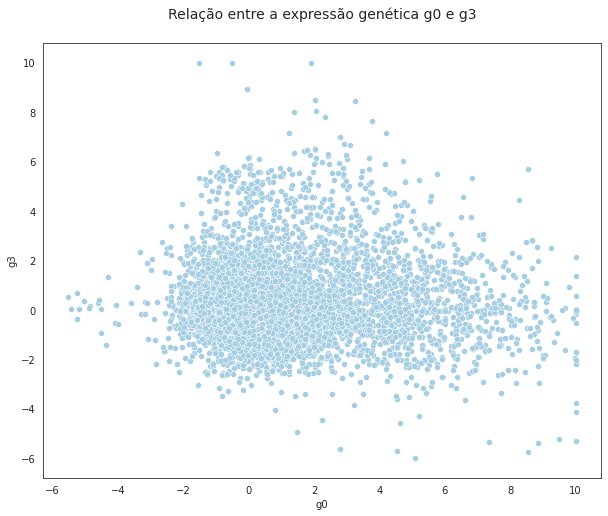

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'g0', y = 'g3', data = data)
plt.title('Relação entre a expressão genética g0 e g3', pad=25, fontsize=14)

Observando o gráfico acima, não parecemos encontrar nenhum padrão tão definido. Então, vamos confrontar mais duas colunas para verificar se encontramos algum padrão.

Aqui, vamos usar a variável g0 para o eixo x e a variável g8 para o eixo y para construir o nosso novo gráfico.

Como retorno, recebemos um gráfico de dispersão onde a nuvem de pontos cartesianos parece desenhar melhor um padrão: conforme o g0 aumenta, o valor de g8 diminui. Aparentemente, a relação entre essas duas variáveis desenha uma **curva com inclinação negativa**.

Text(0.5, 1.0, 'Relação entre a expressão genética g0 e g8')

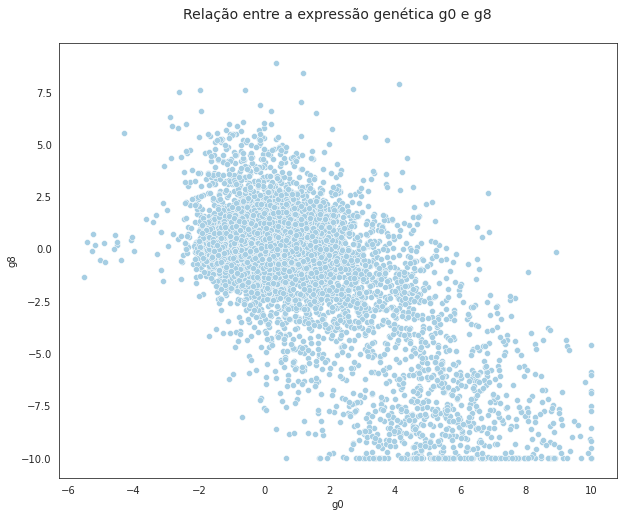

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'g0', y = 'g8', data = data)
plt.title('Relação entre a expressão genética g0 e g8', pad=25, fontsize=14)

E, como parte do nosso trabalho é levantar hipóteses e confirmá-las (ou não), precisamos verificar se a nossa suspeita de que a relação entre as variáveis g0 e g8 desenha uma curva com inclinação negativa.

Para isso, vamos utilizar uma outra função do Seaborn, a **`lmplot`**. 

A `lmplot` vai desenhar no nosso gráfico de dispersão uma **linha de tendência** e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Text(0.5, 1.0, 'Relação entre a expressão genética g0 e g8')

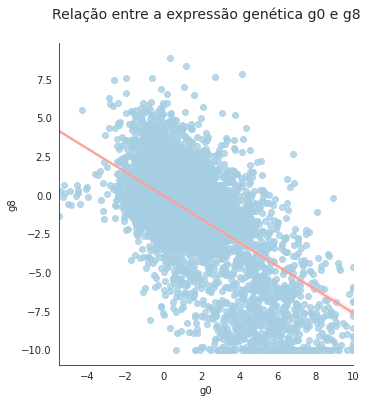

In [57]:
sns.lmplot(data=data, x='g0', y = 'g8', line_kws = {'color':'r'})
plt.title('Relação entre a expressão genética g0 e g8', pad=25, fontsize=14)

Para uma análise mais real e completa, é interessante que separemos ainda mais o nosso conjunto de dados. Isso porque, na imagem acima, apesar de termos uma linha de tendência para a relação entre os dados g0 e g8, **não há filtros para a dosagem, o tratamento e o tempo**. E, pesando em drug discorevy, é extremamente importante que façamos a separação desses conjuntos.

Então, vamos acrescentar mais alguns parâmetros para executar a separação. Acrescentamos o parâmetro 

> **`col = tramento`** para que sejam plotados gráficos de acordo com as categorias da variável em questão nas colunas (`com_droga` e `com_controle`) 

e também incluímos o parâmetro


> **`row = 'tempo'`** para que mais uma subdivisão seja feita e, as linhas apresentem novos gráficos com as diferentes categorias (`24`,`48` e `72`).

Assim, podemos perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

Text(0.5, 1.0, 'Relação entre a expressão genética g0 e g8 para diferentes tratamentos')

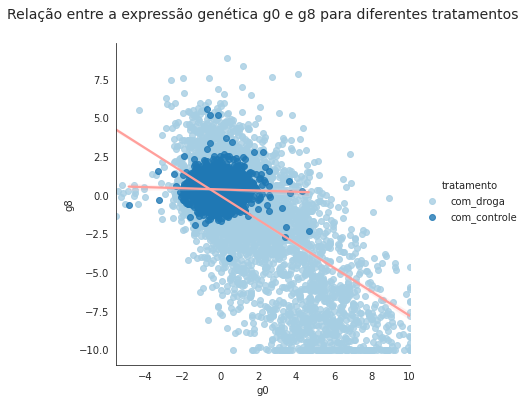

In [58]:
sns.lmplot(data=data, x='g0', y = 'g8', hue= 'tratamento', line_kws={'color':'r'})
plt.title('Relação entre a expressão genética g0 e g8 para diferentes tratamentos', pad=25, fontsize=14)

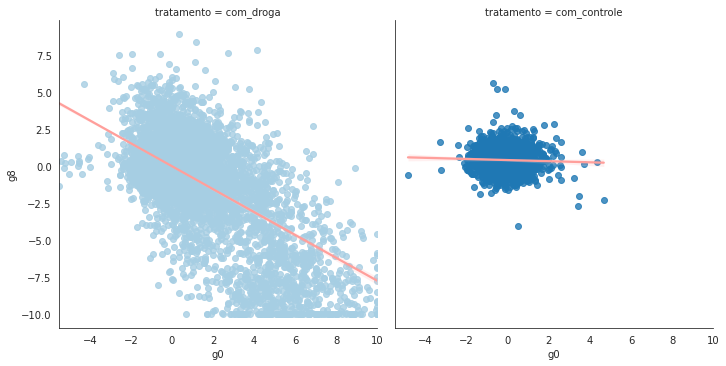

In [59]:
sns.lmplot(data=data, x='g0', y = 'g8', line_kws = {'color':'r'}, col= 'tratamento', hue='tratamento')

Pode-se observar que com o passar do tempo de exposição parece haver uma maior inclinação da linha de tendência nos tratamentos `com_droga`, enquanto o tratamento `com_controle` permanece estável (como esperado).

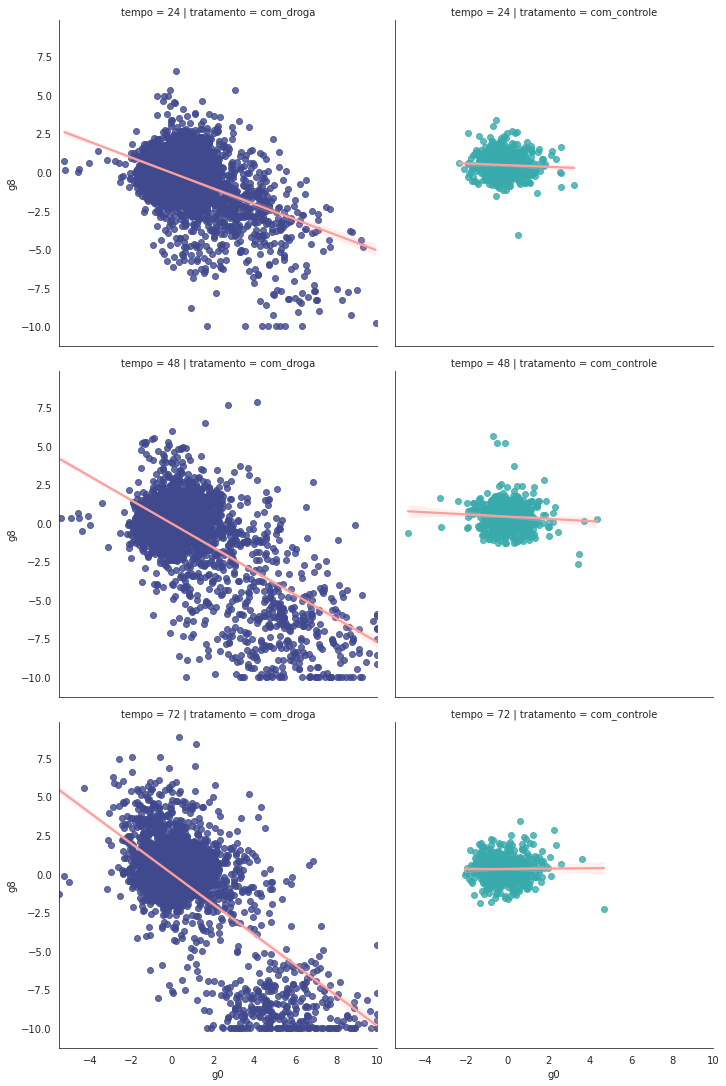

In [60]:
sns.lmplot(data=data, x='g0', y = 'g8', line_kws = {'color':'r'}, col= 'tratamento', row='tempo', hue='tratamento', palette="mako")

Outra medida para analisar como as variáveis estão associadas é a **correlação**.

Para isso, vamos usar uma função já conhecida do Pandas, o `loc` e, vamos agregar o `.corr`. 

O `loc` serve para definirmos o **intervalo em que a correlação vai ser calculada**. Aqui, estamos calculando a correlação entre todos os genes.

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1. 

> **Mas, como interpretar esses valores?**


Bom, temos a seguinte divisão:

- _Valores muito próximos de 1 ou -1_: variáveis **altamente correlacionadas**
- _Valores muito próximos de 0_: variáveis **pouco ou não correlacionadas**

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. 

Quer dizer:

- Valores muito próximos de 1: variáveis **proporcionalmente correlacionadas**
- Valores muito próximos de -1: variáveis correlacionadas **inversamente proporcionais**


Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com `g0` e `g8` e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de **-0,604212**.

In [61]:
data.loc[:, 'g0': 'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

O **mapa de calor** mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a **força da correlação sendo mostrada através de uma cor associada**.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões gênicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que **não podemos inferir causalidade a partir da correlação**, como já descrevemos anteriormente no gráfico de dispersão. 

> Exemplo

Vimos que `g0` e `g8` têm correlação inversamente proporcional entre si mas não podemos concluir que é o `g0` que faz o `g8` diminuir, ou seja, a causa.


Text(0.5, 1.0, 'Correlação entre as expressões gênicas')

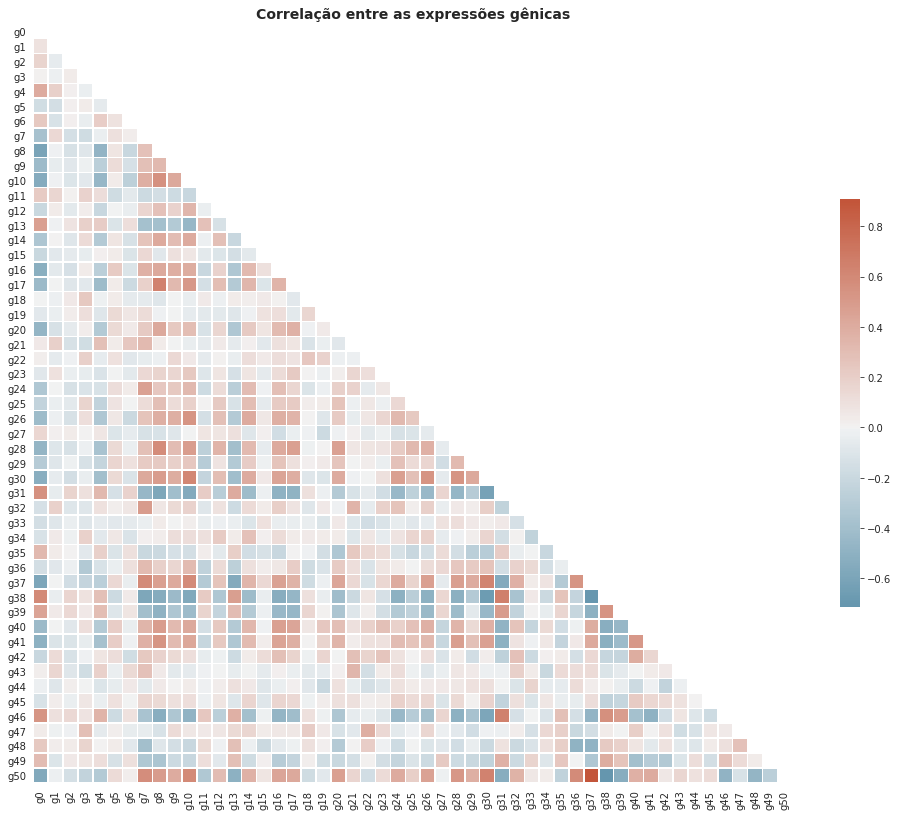

In [62]:
import numpy as np

corr = data.loc[:,'g0':'g50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as expressões gênicas', fontsize=14, fontweight='bold' )

Pela quantidade de pontos mais translúcidos pode-se inferir que a correlação entre as expressões genéticas são baixas.

Agora, vamos repetir o processo de construção do mapa de calor para a a viabilidade celular (c).

Definimos uma nova variável `corr_celular` e ajustamos os parâmetros de acordo com os nossos cs.

Observando o gráfico de saída, podemos perceber uma grande diferença entre os dois mapas de calor que construímos. 

A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

Text(0.5, 1.0, 'Correlação entre as expressões gênicas')

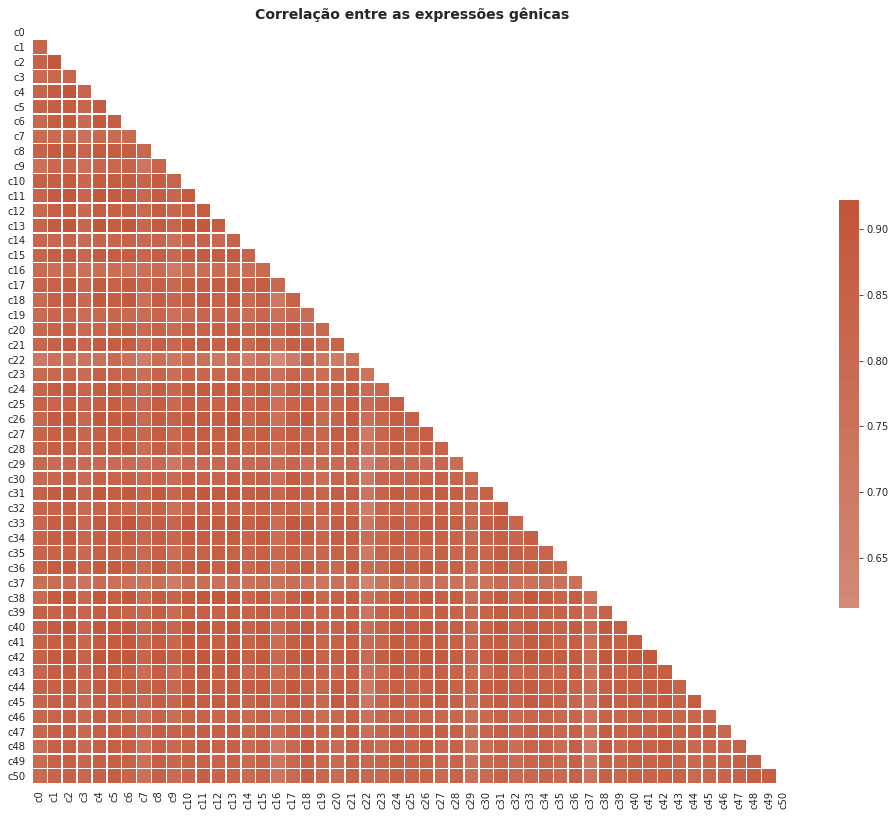

In [63]:
corr_celular = data.loc[:,'c0':'c50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlação entre as expressões gênicas', fontsize=14, fontweight='bold' )

#### **Desafio 05** | Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos

In [64]:
corr_GC = data.loc[:, 'g0':'g10'].merge(data.loc[:, 'c0':'c10'], on=data['id']).corr()
corr_GC

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,-0.624116,-0.624810,-0.639789,-0.604041,-0.606231,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,-0.626020
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,-0.037405,-0.030558,-0.039616,0.011899,-0.027014,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,-0.011896
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,-0.168656,-0.178692,-0.176733,-0.156894,-0.180127,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,-0.180958
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,-0.037342,-0.093505,-0.085298,-0.029079,-0.065964,-0.054947,-0.118651,-0.031232,-0.060544,-0.098435,-0.056865
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,-0.403545,-0.379840,-0.392841,-0.357850,-0.365118,-0.384914,-0.364633,-0.378776,-0.383263,-0.346834,-0.379019
g5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,0.209358,0.198890,0.211988,0.193327,0.206762,0.203880,0.192688,0.175350,0.202728,0.161127,0.187621
g6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.103316,-0.079528,-0.078782,-0.093048,-0.055324,-0.080601,-0.077305,-0.095393,-0.077597,-0.075972,-0.074455
g7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,0.486478,0.553859,0.565002,0.520284,0.562647,0.537956,0.588667,0.489653,0.564259,0.580210,0.554030
g8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,0.556854,0.621422,0.601678,0.597372,0.564174,0.545600,0.591920,0.607309,0.579543,0.599025,0.558254,0.589560
g9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,0.423656,0.435235,0.475424,0.488331,0.454065,0.485965,0.460828,0.488941,0.435394,0.475289,0.459052,0.464495


Text(0.5, 1.0, 'Correlação entre as expressões gênicas(g) e a linhagem celular(c)')

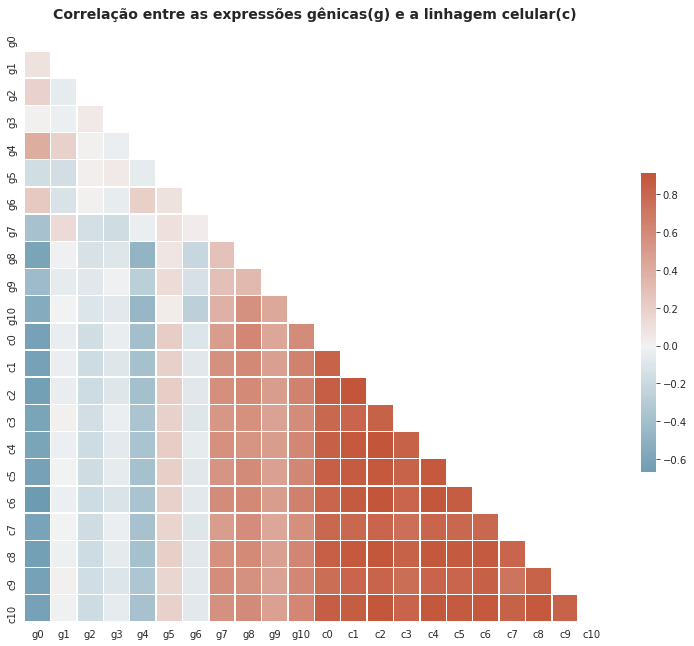

In [65]:
mask = np.zeros_like(corr_GC)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 11))
    ax = sns.heatmap(corr_GC, mask=mask, cmap=cmap, center=0,
                     linewidths=.5, cbar_kws={"shrink": .5})
    
plt.title('Correlação entre as expressões gênicas(g) e a linhagem celular(c)', fontsize=14, fontweight='bold' )

Os genes de 0 e 4 apresentação uma relação inversamente proporcional as linhagens celular. Os genes 7 a 10 apresentaram uma relação diretamente proporcional as linhagens celulares. 

#### **Desafio 06** | Estudar o código que plota a matriz de correlação (heatmap)

#### **Desafio 07** | Compartilhar o aprendizado com a aula

# 🤿 IMERSÃO DE DADOS - ALURA
## AULA 4 | Merge de dados e Análise de Resultados
----
**Objetivo:** Até o momento trabalhamos com a base de dados experimentais e nesta aula, vamos analisar a base de dados resultados, combinando as duas bases com a função merge do pandas. Em seguida, vamos analisar a relação entre algumas informações da base de dados experimentais e resultados utilizando o boxplot. Por fim, entenderemos o que é o mecanismo de ação (MoA) de uma droga.

<br>

🎞️ [YOUTUBE](https://youtu.be/meOsw7STwus) com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 

In [66]:
result_data = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Com a ajuda da Vanessa, descobrimos que esses nomes remetem aos mecanismos de ação das drogas(MoA). Ou seja, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima, proteína, etc) com a droga utilizada. 

**Mecanismo de ação(MoA)** é a interação bioquímica da droga administrada. Ela traz a informação do alvo e a ação sobre o alvo. 

> **`alpha_reductase_inhibitor`** | `alpha-reductase` é uma enzima que está sendo inibinda. 

#### 📒 Vocabulário

- **Spike**: 
- **Agonista**: ativam o receptor
- **Antagonista** : bloqueiam o receptor

<br>

#### **Processo de infecção das células**

As nossas células possuem receptores que poderão de combinar com as `spikes` do vírus, permitindo que entre na célula. Uma vez dentro, o vírus consegue depositar seu material genético, fazendo com que seja replicado. 

Uma das formas utilizadas para neutralizar o vírus é mimetizar esses receptores com drogas bloqueadoras. Essas drogas são fabricadas inserindo um gene humano sintetizados do receptor em uma bactéria, que fará a replicação dessas proteínas, chamadas de **proteínas recombinantes**. Essas proteínas se ligam nos spikes do v[irus, impedindo a contaminação da célula. 

[imagem]

Agora já sabemos que cada coluna do nosso dataframe representa um mecanismo de ação. Olhando para nosso cabeçalho percebemos que temos praticamente todos os dados com o valor 0. Será que todos os dados da tabela tem esse valor? Vamos investigar!

In [67]:
result_data['acetylcholine_receptor_agonist'].unique()

array([0, 1])

Nosso resultado foi um array entre 0 e 1. Se você quiser fazer um teste com todos os outros mecanismos de ação também encontrará o resultado entre 0 e 1. Mas por que isso acontece?

Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. **Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0**.

Portanto, todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

Vamos fazer uma investigação agora que pode ser muito interessante para o cientista que está trabalhando nesse projeto: **qual foi o mecanismo de ação que foi mais ativado?**

Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [68]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Vimos que uma delas apresenta como resultado 1 objeto. Ou seja, não conseguiremos aplicar a função soma de forma direta.

Vamos então fazer essa soma excluindo a coluna id, que possui dados diferentes de números em sua composição, da seguinte maneira:

In [69]:
count_moa = result_data.drop('id', axis=1).sum().sort_values(ascending=False)
count_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

#### **Desafio 01** | Encontrar o top 10 das ações do MDA

Legal. No resultado há uma informação que nos chama a atenção: os inibidores, no topo do nosso resultado, são os que possuem maior quantidade de resultados positivos. Seria um ponto a se investigar.

Então aqui vamos ter o nosso primeiro desafio da aula 4. Lembrando que todos os desafios estão no final desse notebook da aula.

Nós fizemos uma contagem para saber onde o mecanismo de ação obteve mais respostas; agora vamos fazer outros testes.

Vamos verificar se a linha específica que vamos escolher foi ativada em algum momento. E, se ela foi ativada, quantas vezes isso ocorreu?

Utilizaremos o seguinte código:

In [70]:
result_data.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

E aqui temos o nosso resultado. Na primeira linha tivemos uma única ativação. Já na segunda não obtivemos nenhuma. Na terceira tivemos 3, e assim por diante. Nesse que tivemos a resposta como 0, precisaríamos saber se foi um controle, ou se realmente a droga não ativou nenhuma resposta.

Aqui embaixo temos os nossos dados dos resultados:

In [71]:
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
data.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Na base de dados resultados não temos a informação que queremos, referente ao tratamento. Nós só temos a coluna tratamento na base de dados inteira.

No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna. Então, agora, precisamos de alguma maneira, mesclar essas informações.

Antes de fazer esse passo, de mesclar, vamos criar duas novas colunas na base de dados resultado. Vamos criar uma primeira coluna que vamos chamar de n_moa(número de moas ativos), que é justamente o que havíamos calculado anteriormente, dessa maneira:

In [73]:
result_data['n_moa'] = result_data.drop('id', axis=1).sum(axis=1)

Vamos então verificar se a coluna apresenta resultados diferentes de 0; se for diferente de 0 ela retorna a mensagem 'true'; se for igual a 0 retorna 'false':

In [74]:
result_data['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

In [75]:
result_data['ativo_moa'] = (result_data['n_moa'] != 0)
result_data.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


Para visualizarmos basta ir até as duas últimas colunas que elas estarão lá.

Agora que temos as duas colunas que queremos, vamos mesclar, ou então "mergear", as informações que queremos.

Para isso vamos utilizar o merge do pandas, através desse código:

In [76]:
 dados_combinados = pd.merge(data, result_data[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [77]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [78]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

#### **Desafio 02** | Criar coluna eh_controle ara quando na linha tratamento == com_controle

#### **Desafio 03** | Criar três coluinas para indicar o tempo 24, 48, 72 

#### **Desafio 04** | Estudar sobre as combinações de dataframes

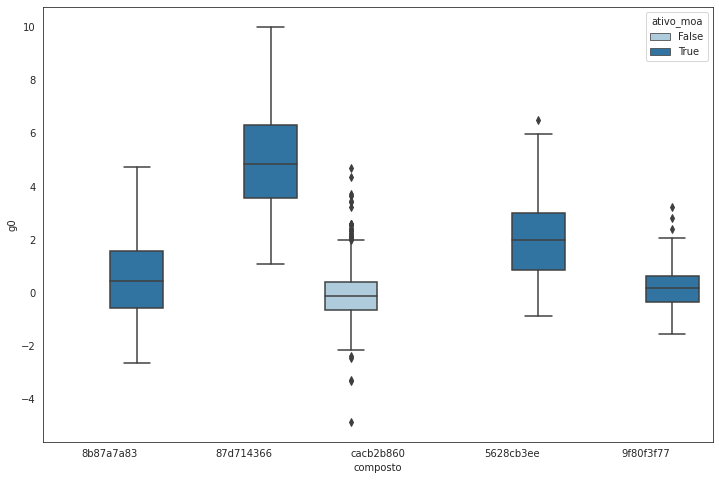

In [79]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g0', x='composto', hue='ativo_moa')

#### **Desafio 05** | Realizar uma análise mais detalhada considerando tempo e dose, para comparar as distribuições

#### **Desafio 06** | Descobrir se a variação do tempo em alguma das configurações do experimento, ativa ou não o MOA (Mecanismo de ação) e se o MOA difere. 

#### **Desafio 07** | Resumo do que aprendeu com os dados

Analisando os boxplots, percebemos que temos algumas categorias com a mediana próxima de 0; temos outra com a mediana próxima de 5 e a outra próxima de 2.

É curioso observarmos também que o 3º boxplot, da esquerda para a direita, está bem concentrado; esse composto específico é na verdade o composto que nos indica que foi "com tratamento".

Outro ponto interessante é que o último boxplot tem um comportamento muito semelhante ao 3º; provavelmente a droga não modificou tanto assim o gene 0.

Agora é com você! Faça os desafios e nos encontramos na próxima aula.

# 🤿 IMERSÃO DE DADOS - ALURA
## AULA 5 | Machine Learning, Sci-kit learning e desafios envolvidos
----
**Objetivo:** Nesta aula, finalmente vamos criar o nosso primeiro modelo de Machine Learning para classificar um novo composto com o intuito de prever se o MoA foi ativado ou não. Para isso, vamos usar a famosa biblioteca scikit-learn para testar a regressão logística e entender o funcionamento de uma árvore de decisão (AD). Além disso, discutiremos problemas importantes como o overfit.

<br>

🎞️ [YOUTUBE]() com participação de **Thiago G. Santos**, **Vanessa Leiko** e **Guilherme Silveira**. 

Na última aula nós analisamos separadamente, através de algumas técnicas, os efeitos em cada gene do grupo "com_tratamento" usados. Além disso utilizamos o boxplot para nos auxiliar na análise de forma visual tirando algumas conclusões muito interessantes.

Você conseguiu fazer todos os desafios? Então vamos mergulhar juntos na aula 05!

Nesta aula, vamos entender e aplicar o Machine Learning. Primeiramente, vamos entender o que o ML significa. Existem muitas definições para o termo, mas aqui, vamos trazer a definição clássica de um renomado e importante cientista da computação, o Arthur Samuel.

“Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed” – (definição clássica de Arthur Samuel, cientista da computação, 1959)

Tradução livre: "Machine Learning é um campo de estudo que dá aos computadores a habilidade de aprender sem terem sido programados para tal."

Podemos interpretar a definição de Samuel, da seguinte forma: para que um computador reconheça determinada imagem, não precisamos passar um conjunto de regras, mostrar vários exemplos é suficiente para que o computador classifique suas imagens. Sendo assim, temos dois fatores determinantes neste processo: um conjunto de dados suficientemente grande e um poder computacional elevado. Por isso, até os anos 2000, era bem difícil encontrarmos problemas significantes resolvidos através do Machine Learning. Mas, a partir de 2009, empresas como a Netflix e Amazon, começaram a resolver problemas reais com o processamento dos dados através no ML, isso porque tinham uma infinidade de dados disponíveis e alto poder computacional.

E quais problemas podemos resolver com esse tipo de algoritmo? Existem diversos casos em que podemos aplicá-los mas, vamos subdividir em dois grandes grupos:

- Problemas em que somos muito bons em resolver mas o Machine Learning, leva essa produção à um nível industrial, como é o caso da classificação de imagens
- Problemas em que não somos tão bons em resolver e o Machine Learning pode tomar uma melhor decisão em relação à nossa (imparcialidade, pode ser um fator), como é o caso da concessão de crédito.
Mas como o Machine Learning vai ser aplicado no nosso problema? Bom, utilizando a nossa base de dados dados_combinados, o primeiro problema que pensamos em resolver é: dado os experimentos, queremos saber se qualquer mecanismo de ação foi ativado ou não ativado. Ou seja, este caso é um problema de classificação binária.

Mas, também podemos pensar se dado os experimentos, queremos saber se um determinado mecanismo de ação foi ativado, recebendo como resposta, o composto relacionado. E aqui, temos um problema de classificação multiclasse, já que cada composto químico é considerado uma classe diferente.

In [80]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Mas, na nossa base dados_resultados nós encontramos o ID do composto e quais mecanismos de ação foram acionados por determinado experimento. Aqui, como um composto pode acionar mais de um mecanismo, nós teremos uma classificação multilabel (quando uma única instância pode ter mais de uma classe associada) e, através de um algoritmo de Machine Learning nós também podemos resolver este problema: não somente ter como retorno se um mecanismo de ação foi ativado mas qual ou quais são estes mecanismos.

É importante lembrar que nossas bases de dados estão separadas com um propósito. A segunda dados_resultados é como se fosse a resposta da primeira e foi construída por cientistas que analisaram o efeito de um determinado composto nos mais de 700 genes. Esse conhecimento, virou uma base de dados com o passar dos anos e é fruto de análise científica.

E o papel de um modelo de ML neste caso é, a partir de todo esforço humano empenhado por vários anos para entender e tabular qual efeito de um composto quimíco em uma determinada expressão gênica, ser treinado e aprender, ou seja, ser capaz de produzir resultados compatíveis com aqueles feitos pelos(as) próprios(as) cientistas.

Aqui na imersão, vamos começar resolvendo o problema menos complexo, a classificação binária: dado os experimentos, queremos saber se QUALQUER mecanismo de ação foi ativado ou não. Basicamente, queremos que o modelo faça predições compatível com a última coluna da nossa base de dados dados_combinados, a ativo_moa.

In [81]:
dados_resultados.head()

NameError: ignored

As etapas lógicas do nosso processo é:

Dado um composto -> temos a nossa assinatura celular (```g e c```) -> analisamos o(s) mecanismo(s) de ação ativados (MoA) 
Mas, a nossa pergunta a ser respondida é, "Dado um composto e uma assinatura celular, houve algum MoA ativado?" Então, as etapas lógicas passam a ser:

Composto -> assinatura celular -> MoA ativado?
E como nosso modelo vai aprender a partir da nosa base de dados?

Composto 1 -> Assinatura A -> MoA = 1
Composto 2 -> Assinatura B -> MoA = 0
Composto 3 -> Assinatura C -> MoA = 1
...
Composto N -> Assinatura N -> MoA = 0
Ou seja, toda a nossa base de dados dados_combinados será a fonte de aprendizado do nosso modelo. Onde, cada experimento (linha) representa um exemplo (assinatura) já que temos a reunião de todas as informações necessárias para criar a nossa classificação binária e, terá como variável resposta, também chamada de target, a coluna ativo_moa, uma variável binária (0, 1).

E, por fim, o nosso modelo deverá ser capaz de resolver o seguinte problema:

Composto candidato -> Assinatura X -> MoA = 1 OU MoA = 0?
Existem diversas técnicas de ML que são capazes de solucionar o nosso problema mas aqui, vamos usar a Regressão Logística e, essa técnica já está implementada em uma biblioteca bastante usada e bem importante para ML no Python, o Scikit-Learn.

Sugerimos que você leia essa documentação e se familiarize com esta biblioteca, ela será muito importante na sua trajetória como Cientista de Dados. E, clicando em "Classification" na página inicial, encontramos, no primeiro capítulo, chamado "Linear Models", o nosso subtítulo de interesse: "1.1.11 Logistic Regression".

Quando implementamos um modelo de classificação, precisamos separar a nossa base de dados em base de treino e base de teste. A base de treino, vai ser onde o nosso modelo vai aprender e, a base de teste serve para a verificação do aprendizado do modelo, ou seja, poderemos entender se, de fato, as previsões do nosso modelo estão de acordo com o esperado.

Não podemos treinar e testar o modelo com o mesmo conjunto de dados porque, seria muito mais fácil dele prever corretamente. A base de dados de teste, funciona como um novo conjunto onde poderemos medir o quanto o nosso modelo está acertando, dado que já temos a variável resposta real.

Para fazer esta divisão, usamos uma função do Scikit-Learn chamada train_teste_split (como já aprendemos, para usar uma biblioteca ou função, precisamos, primeiramente, fazer a importação padrão e, neste caso, usaremos from sklearn.model_selection import train_test_split).

Para fazer a divisão da base de dados, é necessário definir qual será o nosso x e o nosso y. Um modelo matemático, define um y em função de um x, ou seja, f(x) = y. Neste projeto, o nosso y será o target, ativo_moa e, ele será definido a partir de uma assinatura (conjunto composto por g + c ou , expressão gênica + viabilidade celular).

Assim, teremos:

x = dados_combinados.select_dtypes('float64')  ->  toda a base de dados que tem os valores com o formato, ```float64```, no nosso caso, todas as variáveis ```g``` e ```c```
 
y = dados_combinados['ativo_moa']  ->  apenas a coluna target, ou seja, ```ativo_moa```
Para o train_test_split definiremos:

x_treino, x_teste, y_treino, y_teste
E a função receberá como parâmetro:

train_test_split(x, y, test_size = 0.2)
Onde,

x -> base de dados definida como x, no nosso caso, todas as variáveis ```g``` e ```c```
 
y -> variável resposta, no nosso caso, ```ativo_moa```
 
teste_size = 0.2 -> tamanho que definimos para a base de teste
A proporção entre treino e teste, varia de acordo com o volume de dados que temos. Mas, usualmente, encontramos proporções 30/70, 25/75 ou 20/80. Aqui, definimos como 0,2 ou 20%, isso significa que a base de treino será composta pelos 80% restante.

In [ ]:
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

Agora, podemos fazer a nossa primeira regressão logística.

O primeiro passo, é definir o nosso x, y e o x_treino, x_teste, y_treino, y_teste do train_test_split.

Após isso, definimos um nome para o nosso modelo (modelo_rlogistica) e declaramos a função LogisticRegression(). Acrescentamos um parâmetro max_iter = 1000 no modelo para que ele seja capaz de convergir para um resultado e assim, não recebemos nenhum warning no resultado.

Em seguida, ajustamos o modelo com o .fit(x_treino, y_treino) (lembrando que os argumentos desta função são x e y e, usamos x_treino e y_treino porque será através dessas bases que o algoritmo aprenderá).

E, por fim, usamos a função .score(x_teste, y_teste) para verificar como o nosso modelo ajustado está se saindo nos dados de teste. O score()calcula a acurácia, ou seja, quantas predições o nosso modelo acertou na base de teste.

Como resultado, temos o valor da acurácia: ~0,627. Então, concluímos que o nosso modelo está acertando ~62% das previsões (caso tivéssemos 100 experimentos, o modelo acertaria 62 casos e erraria 38 casos).

Mas, como podemos estabelecer se este é um bom valor de acurácia ou não?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

Para estabelecer se temos um bom valor de acurácia, precisamos de uma base comparativa, quer dizer, preciso dos resultados de um outro modelo para entender se estamos acertando mais ou menos casos.

Para isso, o Scikit-Learn, já tem implementado alguns algoritmos que fazer modelos menos complexos e que podem ser usados como base comparativa. Neste caso, vamos usar o DummyClassifier.

O processo para ajustar este modelo é muito parecido com aquele que usamos para a regressão logística: dividimos a base em treino e teste, definimos um nome para esse modelo e o instanciamos, o ajustamos com os dados de treino e, ao final, verificamos a acurácia com o conjunto teste.

Ao instanciarmos o DummyClassifier, precisamos definir a estratégia que ele usará para fazer o ajuste do modelo. No nosso caso, definimos a estratégia será os dados mais frequentes, isso quer dizer que: dado o valor mais frequente da nossa variável resposta (ativo_moa), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Assim, temos: DummyClassifier('most_frequent').

Nesse momento, para calcular a acurácia, vamos usar outra estratégia, a função accuracy_score também do Scikit-Learn. Ela receberá como parâmetros a base teste da variável resposta (y_teste) e as previsões do modelo que, até o momento ainda não calculamos. Para calcular as previsões, usamos o .predict() da mesma biblioteca que, receberá como parâmetro a base x_teste. Por fim, o cálculo da acurácia será:

previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)
A acurácia do DummyClassifierfoi de ~60,7%, isso significa que nosso modelo LogisticRegression teve um desempenho um pouco melhor.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

Podemos entender a acurácia do DummyClassifier se fizermos um value_counts normalizado e então verificamos que a proporção entre a classe 0 e a classe 1 é 60/30, ou seja, o valor mais frequente (estratégia usada no DummyClassifier) representa 60% da base de dados. Isso quer dizer que, caso o modelo chutasse a mesma classe para todos os eventos da base de teste, teríamos um acerto de 60% dos casos.

In [ ]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

Entretanto, toda vez que rodamos tanto a nossa regressão logística, quanto o nosso dummy classifier, recebemos como retorno um valor diferente de acurácia, apesar de em muitos casos, serem próximos.

O train_test_split a base de dados em subconjuntos aleatórios de treino e teste. Isso significa que toda vez que você executá-lo, você obterá um resultado diferente.

Por outro lado, se você declarar o parâmetro random_state = n, poderá garantir que a saída de todas as execuções será igual, ou seja, sua divisão será sempre a mesma. Não importa qual número você escolherá para o random_state, o importante é que toda vez que você usá-lo, sempre terá a mesma saída.

Além do random_state, existe mais um parâmetro bem importante que deve ser levado em consideração na divisão da nossa base de dados, o stratify.

Se repararmos na divisão da variável ativo_moa, entre true e false, percebemos que segue um balanceamento 60/40. E, é do nosso interesse que as bases de treino e teste sigam, além de uma divisão reprodutível (garantida com random_state), a proporção original do conjunto de dados. Assim, atribuimos stratify = coluna, onde coluna = nome da coluna que o stratify deve levar em consideração a proporção de classes. No nosso caso, usamos stratify = y, pois y é a nossa variável resposta e, é dela que o stratify deve considerar a proporção: 60/40.

Esses parâmetros são úteis, porque garantimos que os resultados são reproduzíveis e compatíveis, independente do modelo (qual técnica, por exemplo, regressão logística, dummy classifier, árvore de decisão e etc) que vamos treinar e testar a partir desta divisão.

Ou seja, ao final, nosso train_teste_split ficará:

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

Nesse momento, temos interesse a explorar outras técnicas de modelagem para comparar os resultados obtidos e ver qual o melhor algoritmo que conseguimos produzir.

Sendo assim, vamos testar uma nova técnica: a árvore de decisão.

Novamente, a sequência lógica para ajustar esse novo modelo é muito parecida com que estávamos vendo até o momento: definimos as bases x e y, fazemos o train_test_split, declaramos o novo modelo, ajustamos e verificamos a acurácia.

Aqui, vamos usar o DecisionTreeClassifier, também da biblioteca Scikit-Learn. O único parâmetro que vamos declarar para esta função será o max_depth = 3 mas, vamos explorar seu significado a seguir.

Como resultado, temos uma acurácia (calculada a partir da base de teste) de ~0,61% e, é um pouco menos do que a acurácia obtida com a regressão logística.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

Agora, vamos entender melhor como funciona uma árvore de decisão e o que significa o parâmetro max_depth = 3. Plotamos uma imagem que representa o nosso modelo e, nesse momento, é importante que você não se apegue ao código que usamos para isso. O que realmente é relevante é entender o algoritmo!

A figura é dividida em 4 níveis e, o primeiro nível (estamos considerando a orientação de cima para baixo), é composto por apenas um quadro que é chamado de nó raíz ou somente raíz e ele tem como regras, os melhores atributos que podem dividir a nossa base de dados em dois conjuntos distintos (lembrando que nosso objetivo é separar a nossa base de dados em mecanismo de ação ativado ou não ativado).

Entre o primeiro e o segundo nível (e nos demais níveis), temos duas setas: uma para a direita e outra para a esquerda. Essas setas são chamadas de ramos e subdividem o nível acima em dois outros conjuntos que separam novamente os dados em mecanismo de ação ativado ou não ativado, a partir de uma decisão.

O último nível da árvore (mais abaixo), apresenta n quadros que apresentam características que devem ser levadas em conta na hora da classificação e se dividem em class = ativado e class = não ativado. Esse nível não apresenta mais ramificações e, esses quadros são chamados de folhas.

Se reparmos, a nossa árvore tem 3 níveis de decisão a partir da raíz e é exatamente isso que o parâmetro max_depthrepresenta: a profundidade da árvore.

In [ ]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

Como vimos, o desempenho do nosso novo modelo com apenas 3 camadas de decisão não foi tão satisfatório assim. Por isso, vamos variar o max_depth dentro de um intervalo de valores (range) e comparar os resultados obtidos.

O processo para obter os valores que queremos, é sempre o mesmo. Por isso, vamos criar um loop ou um laço de repetição (um loop, executa um bloco de código em repetição enquanto uma condição é atendida).

Então, após fazermos a separação da base de dados em x e y e dividí-las no train_test_split, vamos criar um for para que nosso modelo seja treinado e testado em repetição dentro de um range. Para isso, faremos:

teste=[]  ->  criando lista para armazenar os resultados da acurácia nos dados de teste 
treino=[]  ->  criando lista para armazenar os resultados da acurácia nos dados de treino 
for i in range(1,15):  ->  estabelecendo condição que deve ser atendida (i) e range de valor (range(1, 15))
    modelo_arvore = DecisionTreeClassifier(max_depth = i)  ->  instanciando modelo que será treinado e definindo max_depth = i, ou seja, estamos variando a profundidade da nossa árvore
    modelo_arvore.fit(x_treino, y_treino)  ->  ajustando o modelo a partir das bases de treino
    teste.append(modelo_arvore.score(x_teste, y_teste))  ->  armazenando os resultados de acurácia de teste dos modelos produzidos na lista 'teste'
    treino.append(modelo_arvore.score(x_treino, y_treino))  ->  armazenando os resultados de acurácia de treino dos modelos produzidos na lista 'trei

In [ ]:
from sklearn.tree import DecisionTreeClassifier


x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

Quando chamamos as saídas do nosso for (teste e treino), podemos observar um comportamento um pouco estranho: enquanto nos dados de teste, o valor da nossa acurácia vai caindo, nos dados de treino, esse valor vai aumentando.

In [ ]:
teste

In [ ]:
treino

Para investigar o que aconteceu, vamos plotar um gráfico para entender o comportamento combinado dessas listas.

Usaremos o lineplot do Seaborn para construir essa visualização. Como parâmetros, teremos:

x = range(1, 15)   ->  intervalo que usamos no for
y = teste e y = treino  ->  listas criamos no for e será usada no eixo y do gráfico
label = 'teste' e label = 'teste'  ->  etiqueta para identificar as duas linhas que estarão no gráfico 
Observando o gráfico produzido, podemos perceber que, inicialmente, os valores de treino e teste são muito próximos mas, conforme vamos aumentando o range, o valor da acurácia para os dados de treino aumentam muito enquanto, esse mesmo valor para os dados de teste, vai caindo (as linhas vão se afastando).

Isso significa que, conforme aumentamos a profundidade da nossa árvore de decisão, a classificação para os dados de treino ficam muito boas pois, ela consegue captar muito bem as características desses dados. Mas, em contrapartida, o modelo fica tão bom os dados de treino que, quando apresentamos um novo conjunto de dados (teste), ele não consegue generalizar tão bem e assim, temos uma acurácia em queda.

Esse problema de um modelo com performance muito boa nos dados de treino mas performance em queda nos dados de teste, é muito conhecido na ciência de dados e chamamos de overfitting.

Então, conseguimos perceber que, para melhorar o nosso modelo, não é suficiente somente aumentar a profundidade da árvore de decisão e assim, precisamos traçar uma outra etratégia para melhorar a performance do nosso modelo.

Nesse momento, vamos testar uma nova técnica de modelagem: o Random Forest. O que este modelo faz é criar várias árvores de decisões na qual ele considera amostras aleatórias do nosso conjunto total.

In [ ]:
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

A função que treina um modelo de Random Forest (RandomForestClassifier()) não aceita que tenhamos variáveis em formato de string. Por isso, precisamos tratar as variáveis que são strings e transformá-las em números (ou no formato float64).

Para fazer essa transformação, vamos usar uma função do Pandas, chamada get_dummies e nela, declaramos a coluna que queremos que seja transformada. Por exemplo, aqui, usamos:

pd.get_dummies(dados_combinados['tratamento'])
Isso porque, nossa intenção é transformar a coluna tratamento da base dados_combinados em dados numéricos.

Para fazer a transformação desejada, o get_dummies pega todas as categorias de uma variável e as transforma em novas colunas binárias. Por exemplo:

A variável tratamento apresenta duas categorias com_controle e sem_controle. Quando aplicamos o get_dummies, ele cria duas novas colunas binárias e análogas as categorias. Se temos um evento que apresentava na coluna original a marcação com_droga, agora ela apresentará valor 0 na coluna com_controle e valor 1 na coluna com_droga e vice-versa.

In [ ]:
pd.get_dummies(dados_combinados['tratamento'])

Agora que entendemos como o get_dummies funciona, podemos transformar todas as nossas variáveis de interesse: tratamento, dose e tempo.

Para isso, declaramos a base de dados completa e, no parâmetro columns, listamos as variáveis que devem ser transformadas. Assim teremos:

pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

In [ ]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

Aqui, estamos estabelecendo qual será a base de dados usada para modelar o novo algoritmo. Agora, não mais consideraremos apenas os dados genéticos, também levaremos em conta as demais variáveis, exceto as seguintes variáveis:

'id'  ->  não será relevante nesse momento pois é somente um número de identificação
'n_moa'  ->  não será relevante nesse momento pois é a quantidade de MoAs ativados
'ativo_moa'  ->  retiramos da base pois é a nossa variável resposta
'composto'  ->  não será relevante nesse momento pois identifica o composto usado e foge do que estamos buscando fazer
Para retirar essas variáveis da nossa base de dados, usamos a função drop, declaramos as variáveis a serem retiradas em forma de uma lista e identificamos que são colunas através do parâmetro axis = 1.

In [ ]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

Enfim, podemos partir para o ajuste do nosso modelo de Random Forest.

Novamente, vamos seguir as mesmas etapas lógicas anteriores. Entretando, precisamos modificar o a nossa base x. Então faremos:

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)  ->  base de dados de deve ser considerada com a exclusão das colunas que determinamos anteriormente
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])  ->  a partir do x definido acima, fazemos a transformação com o get_dummies nas colunas com o formato de string
Por fim, temos como retorno uma acurácia de ~68,0% e, ela é, aproximadamente, 7% melhor que a acurácia que conseguimos com o DummyClassifier. Aqui, não podemos comparar com a regressão logística porque estamos considerando um outro conjunto de dados.

É muito importante ressaltar que, apesar de termos melhorado a acurácia do nosso modelo, pensando na vida real, talvez a nossa melhora ainda não seja suficiente. Ou seja, desenvolvemos um modelo com um algoritmo de Machine Learning mas, ele ainda não é aplicável à vida real (isso quer dizer que, ainda não nos traz ganhos suficientes para sua implantação).

Por outro lado, durante todo o nosso projeto, desenvolvemos modelos simples e não nos aprofundamos em todos os pontos que podem ser modificados (variáveis, parâmetros de modelos, por exemplo) a fim de otimizar a nossa generalização. Deixamos em destaque também a sua trajetória até aqui, certamente ela deve ser seu foco (e é também o nosso)! O resultado é apenas uma consequência disso tudo e sabemos que, para melhorá-lo você precisa persistir no estudo dessa área.

A Imersão de Dados 3 foi o seu primeiro passo na ciência de dados e aqui, deixamos o convite para que você continue estudando, explorando e aprendendo todos os processos e áreas desse mundo gigantesco de possibilidades!

Nos vemos em breve, cientistas!

In [ ]:
from sklearn.ensemble import RandomForestClassifier


x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula.
Desafio 02: Estude a documentação do Sklearn.
Desafio 03: Pesquisar o fluxograma 'Escolhendo o melhor modelo' choosing the right estimator
Desafio 04: Teste outras problemas (perguntas). 0, 1 ou +.
Desafio 05: Escolha a droga mais utilizada e tente criar um modelo para prever está label.
Desafio 06: Resumo do que você aprendeu com os dados